# GIS Data Science
1. Understand GIS Data types
    - Vector Data - shapefile, GeoJSON
    - Raster data - GeoTIFF, NetCDF,
2. Installation of libraries needed
3. Working with Vector data
4. EDA on vector data
5. Work with Raster data - GeoTIFF
6. Interactive maps  - folium

### Vector data types
- Represent points, lines and polygons - road, boundary
- Commmon formats
    - shapefile (.shp) -
    - GeoJSON - JSON based format for geographical data

### Raster Data (GeoTIFF, NetCDF,)
- Represents a grided data - e.g - Satelite, elevation models
- Common formats:
    - GeoTIFF - (.tif) - stores raster images with geospatial metadata.
    - NetCDF - (.nc) - Used for climatic and environmental data.

In [1]:
# pip install -r requirements.txt

### Working with vector Data

In [2]:
import geopandas as gpd

In [3]:
# Load a shapefile data
path = r"C:\Users\Learner\Desktop\-111daysofCFCchallenge\data\ServiceDistricts.shp"
# Reading a shapefile data
gdf = gpd.read_file(path)
# .shx has index while .shp is the original file with the geolocations stored.

In [4]:
# Display the first few rows
gdf.head()

,geometry
0,"POLYGON ((1766078.549 711757.27, 1766000.028 7..."
1,"MULTIPOLYGON (((1800630.485 619627.187, 180060..."


In [5]:
print(gdf.head())

                                            geometry
0  POLYGON ((1766078.549 711757.27, 1766000.028 7...
1  MULTIPOLYGON (((1800630.485 619627.187, 180060...


In [6]:
# Check the data types
print(gdf.dtypes)

geometry    geometry
dtype: object


In [7]:
# Plotting the shape
import matplotlib.pyplot as plt

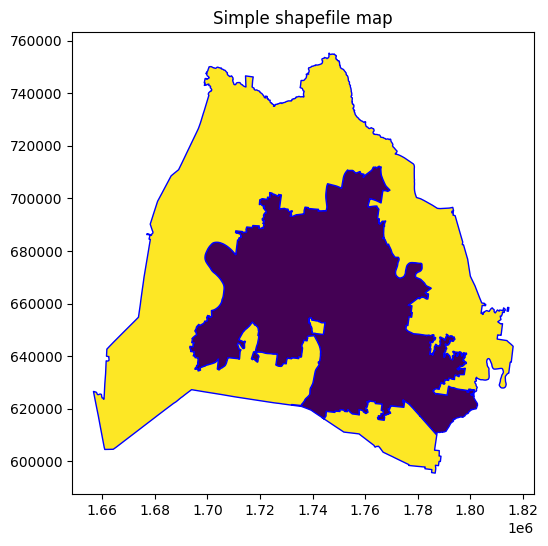

In [8]:
# Plot the shapefile
gdf.plot(figsize = (10, 6), edgecolor = 'blue', cmap = 'viridis')
plt.title("Simple shapefile map")
plt.show()

In [9]:
# Loading a GeoJSON data
path = r"C:\Users\Learner\Desktop\-111daysofCFCchallenge\data\school-district.geojson"
geo_df = gpd.read_file(path)

In [10]:
# Display the data
geo_df.head()

,first_name,city,zip,email,state,last_name,address,position,term_expir,district,phone,geometry
0,Dr. Sharon,Nashville,37218,gentryfordistrict1@comcast.net,TN,Gentry,6108 Beals Lane,Member,2016,1,615-268-5269,"MULTIPOLYGON (((-86.77136 36.38357, -86.77134 ..."
1,Jill,Madison,37115,jill.speering@mnps.org,TN,Speering,1033 Falls Avenue,Vice-Chair,2016,3,615-562-5234,"MULTIPOLYGON (((-86.75365 36.40428, -86.75353 ..."
2,Dr. Jo Ann,Nashville,37220,joann.brannon@mnps.org,TN,Brannon,5444 San Marcos Drive,Member,2018,2,615-833-5976,"MULTIPOLYGON (((-86.76696 36.08333, -86.7659 3..."
3,Anna,Hermitage,37076,anna.shepherd@mnps.org,TN,Shepherd,4545 Raccoon Trail,Chair,2018,4,615-210-3768,"MULTIPOLYGON (((-86.58098 36.20935, -86.58099 ..."
4,Amy,Nashville,37221,amy.frogge@mnps.org,TN,Frogge,7237 Riverfront Drive,Member,2016,9,615-521-5650,"MULTIPOLYGON (((-86.97287 36.20828, -86.97045 ..."


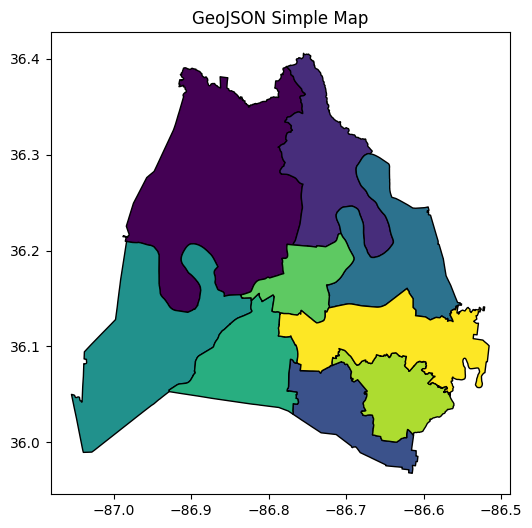

In [11]:
# Plotting the GeoJSON data
geo_df.plot(figsize = (10, 6), edgecolor = 'black', cmap = 'viridis')
plt.title("GeoJSON Simple Map")
plt.show()

In [12]:
print(geo_df.crs)

EPSG:4326


#### The CRS defines how the geometric data is mapped onto the Earth's surface,
#### and it can be a projected coordinate system (e.g., UTM) or a geographic coordinate system (e.g., WGS84).

#### The EPSG (European Petroleum Survey Group) code format, is "EPSG:4326" for WGS84.

In [13]:
# Reprojecting to a different CRS
geo_dft = geo_df.to_crs(epsg = 3857)

In [14]:
geo_dft.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### Working with Raster Files

In [15]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# Open the raster file
raster_path = r'C:\Users\Learner\Desktop\-111daysofCFCchallenge\data\sample.tif'
# load raster data
src = rasterio.open(raster_path)

In [17]:
# Read the raster data (first band)
raster_bd1 = src.read(1)  # Read the first band, 1-indexed

In [18]:
# Get the spatial extent (bounds) of the raster
bounds = src.bounds
print(f'Raster bounds: {bounds}')

Raster bounds: BoundingBox(left=590520.0, bottom=5780620.0, right=600530.0, top=5790630.0)


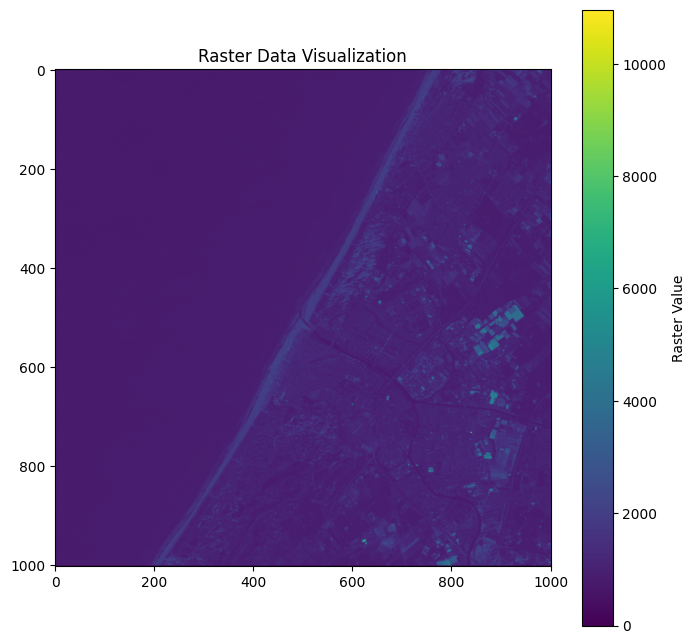

In [19]:
# Plot the raster data
plt.figure(figsize=(8, 8))
plt.imshow(raster_bd1, cmap='viridis')  # Choose a color map (e.g., 'gray', 'plasma', 'coolwarm', etc.)
plt.colorbar(label='Raster Value')  # Add a color bar
plt.title('Raster Data Visualization')
plt.show()

In [20]:
# Read the raster data (second band)
raster_bd2 = src.read(2)  # Read the second band, 2-indexed

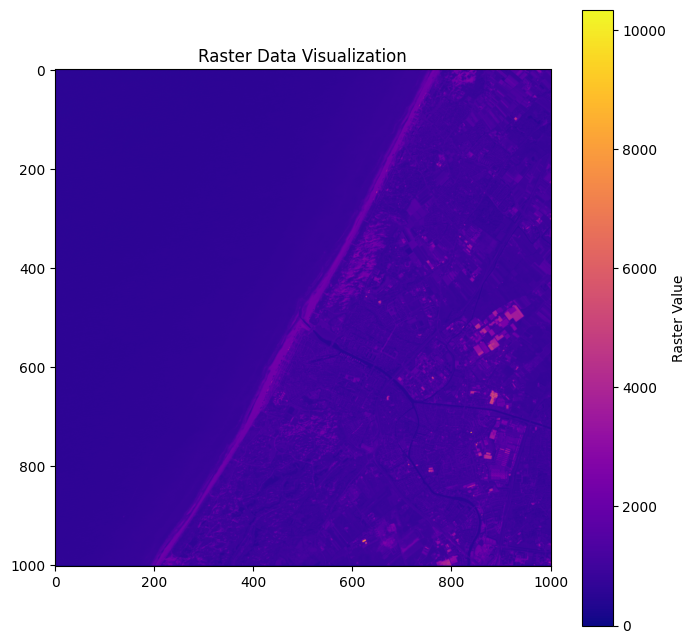

In [21]:
# Plot the raster data
plt.figure(figsize=(8, 8))
plt.imshow(raster_bd2, cmap='plasma')  # Choose a color map (e.g., 'gray', 'plasma', 'coolwarm', etc.)
plt.colorbar(label='Raster Value')  # Add a color bar
plt.title('Raster Data Visualization')
plt.show()

In [22]:
# Get the number of bands in the raster file
num_bands = src.count
num_bands

3

In [23]:
# Read all bands
raster_bd1 = src.read(1)
raster_bd2 = src.read(2)
raster_bd3 = src.read(3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..11652].


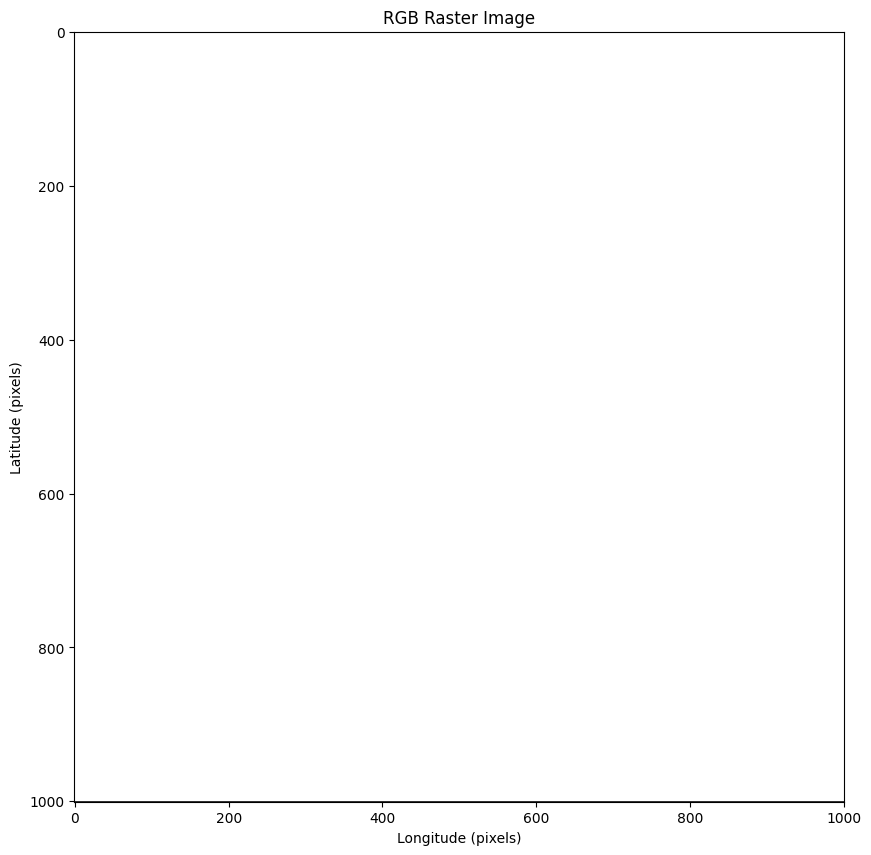

In [24]:
# Stack the bands into an RGB image
rgb = np.stack([raster_bd1, raster_bd2, raster_bd3], axis=-1)

# Display the RGB image
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(rgb)

ax.set_title("RGB Raster Image")
ax.set_xlabel('Longitude (pixels)')
ax.set_ylabel('Latitude (pixels)')

plt.show()